In [281]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

**Import the Dataset**




In [282]:
file_path = "breast-cancer.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/breast-cancer-dataset",
  file_path,
)

/tmp/ipython-input-1122536697.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'breast-cancer-dataset' dataset.


**Dataset Info**

In [283]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [284]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [285]:
# The id column is not needed for prediction
df = df.drop(columns=["id"])

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (569, 30)
y shape: (569,)


In [286]:
# Check for missing values
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [287]:
# Checkin the data distribution
print(f"Class distribution:")
print(df['diagnosis'].value_counts(normalize=True))

Class distribution:
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [288]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

**Split the Dataset**

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [290]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Evaluation Metrics & Visualization**

In [291]:
def evaluate_classification(y_true, y_pred, digits=4, output_dict=False):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(
        y_true, y_pred, digits=digits, output_dict=output_dict
    )

    print(f"Accuracy: {accuracy:.{digits}f}\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=digits))

def plot_confusion_matrix(y_true, y_pred, class_names=("Benign", "Malignant"), figsize=(5, 4), title="Confusion Matrix", cmap=None):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()

    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return cm

**LogisticRegression**

In [292]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [293]:
y_pred = model.predict(X_test_scaled)

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           B     0.9595    0.9861    0.9726        72
           M     0.9750    0.9286    0.9512        42

    accuracy                         0.9649       114
   macro avg     0.9672    0.9573    0.9619       114
weighted avg     0.9652    0.9649    0.9647       114



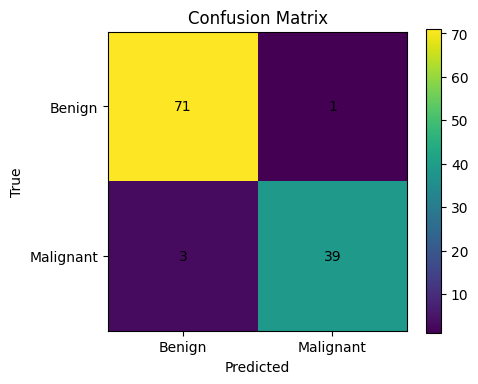

array([[71,  1],
       [ 3, 39]])

In [294]:
evaluate_classification(y_test, y_pred, digits=4, output_dict=False)
plot_confusion_matrix(y_test, y_pred, class_names=("Benign", "Malignant"), figsize=(5, 4), title="Confusion Matrix", cmap=None)

**RandomForestClassifier**

In [295]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [296]:
y_pred = rf_model.predict(X_test)

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           B     0.9474    1.0000    0.9730        72
           M     1.0000    0.9048    0.9500        42

    accuracy                         0.9649       114
   macro avg     0.9737    0.9524    0.9615       114
weighted avg     0.9668    0.9649    0.9645       114



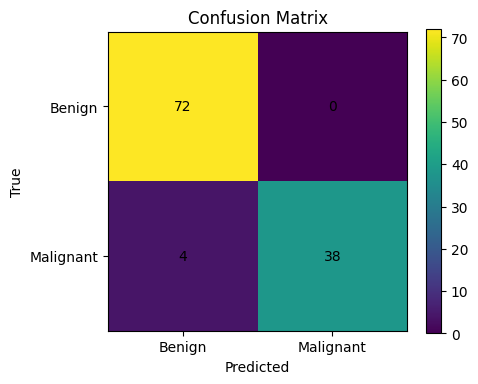

array([[72,  0],
       [ 4, 38]])

In [297]:
evaluate_classification(y_test, y_pred, digits=4, output_dict=False)
plot_confusion_matrix(y_test, y_pred, class_names=("Benign", "Malignant"), figsize=(5, 4), title="Confusion Matrix", cmap=None)

**MLP**

In [298]:
X = X.values
y = y.values
y = np.where(y == "M", 1, 0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [299]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [300]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [301]:
# Dataset class
class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = BreastCancerDataset(X_train, y_train)
test_dataset = BreastCancerDataset(X_test, y_test)
val_dataset = BreastCancerDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)
val_loader = DataLoader(val_dataset, batch_size=32)

In [302]:
# MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [303]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("The device: ", device)

model = MLP(input_dim=X_train.shape[1]).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

The device:  cpu


In [304]:
epochs = 200

train_losses = []
val_losses = []

for epoch in range(epochs):
    # ---- Training ----
    model.train()
    running_train_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ---- Validation ----
    model.eval()
    running_val_loss = 0.0

    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    if (epoch + 1) % 10 == 0:
        print(
            f"Epoch [{epoch+1}/{epochs}] "
            f"Train Loss: {avg_train_loss:.4f} | "
            f"Val Loss: {avg_val_loss:.4f}"
        )


Epoch [10/200] Train Loss: 0.5839 | Val Loss: 0.5774
Epoch [20/200] Train Loss: 0.4406 | Val Loss: 0.4210
Epoch [30/200] Train Loss: 0.2937 | Val Loss: 0.2679
Epoch [40/200] Train Loss: 0.2000 | Val Loss: 0.1775
Epoch [50/200] Train Loss: 0.1469 | Val Loss: 0.1328
Epoch [60/200] Train Loss: 0.1309 | Val Loss: 0.1081
Epoch [70/200] Train Loss: 0.1070 | Val Loss: 0.0935
Epoch [80/200] Train Loss: 0.0910 | Val Loss: 0.0837
Epoch [90/200] Train Loss: 0.0910 | Val Loss: 0.0777
Epoch [100/200] Train Loss: 0.0794 | Val Loss: 0.0735
Epoch [110/200] Train Loss: 0.0655 | Val Loss: 0.0701
Epoch [120/200] Train Loss: 0.0682 | Val Loss: 0.0682
Epoch [130/200] Train Loss: 0.0596 | Val Loss: 0.0666
Epoch [140/200] Train Loss: 0.0640 | Val Loss: 0.0660
Epoch [150/200] Train Loss: 0.0568 | Val Loss: 0.0655
Epoch [160/200] Train Loss: 0.0525 | Val Loss: 0.0656
Epoch [170/200] Train Loss: 0.0634 | Val Loss: 0.0653
Epoch [180/200] Train Loss: 0.0485 | Val Loss: 0.0658
Epoch [190/200] Train Loss: 0.0507 | 

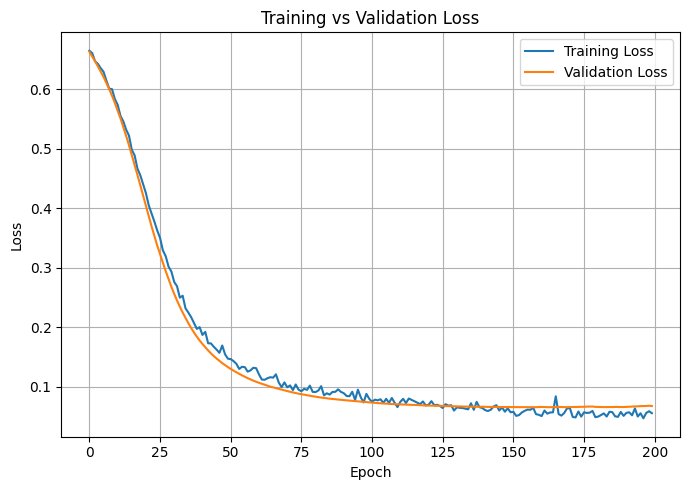

In [305]:
plt.figure(figsize=(7, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [306]:
model.eval()
with torch.no_grad():
    logits = model(X_test.to(device))
    probs = torch.sigmoid(logits)
    preds = (probs > 0.5).int().cpu().numpy()

Accuracy: 0.9884

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9818    1.0000    0.9908        54
         1.0     1.0000    0.9688    0.9841        32

    accuracy                         0.9884        86
   macro avg     0.9909    0.9844    0.9875        86
weighted avg     0.9886    0.9884    0.9883        86



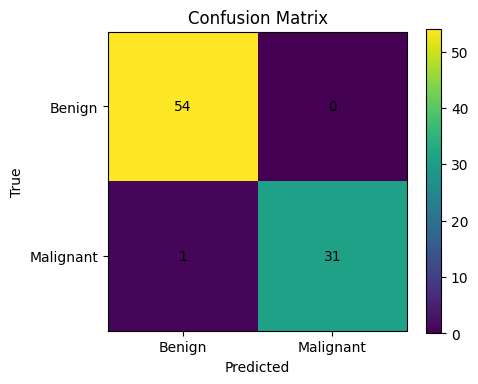

array([[54,  0],
       [ 1, 31]])

In [307]:
evaluate_classification(y_test, preds, digits=4, output_dict=False)
plot_confusion_matrix(y_test, preds, class_names=("Benign", "Malignant"), figsize=(5, 4), title="Confusion Matrix", cmap=None)